# Sampling Methods: Accept/reject for unbounded distributions

#### 08/22, written by Alice Cicirello (alicecicirello8@gmail.com) 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

Consider the distribution

$$
 p(x) = e^{- \pi x^2}
$$

with $ - \infty \leq x \leq  \infty $ - this probability density function integrates to 1

In [2]:
def unbounded_func(x):
    return np.exp(-np.pi * x**2)

num_samples=5000

## Using the algorithm developed for bounded distributions

Upper bound is: 0.999996857155271
Efficiency is only 10.4%


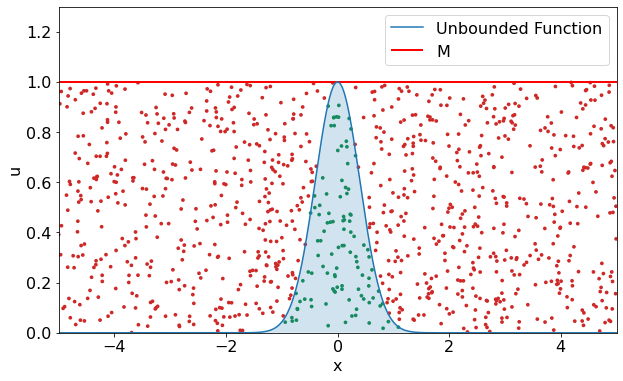

In [3]:
# note that now the xmin and xmax are -inf +inf. Only -5 +5 are going to be considered

def batch_sample_2(function2, num_samples,  xmin, xmax, ymax,  batch=1000):
    x = np.random.uniform(low=xmin, high=xmax, size=batch)
    y = np.random.uniform(low=0, high=ymax, size=batch)
    passed = (y < function2(x)).astype(int) # generate an array of 0 (not_pass) and 1 (pass)
    return x, y, passed

xmin2=-5
xmax2=5
xs2 = np.linspace(xmin2, xmax2, num_samples)
ys2 = unbounded_func(xs2)

alphav2=0 # margin value on M

M2=(1+alphav2)* max(unbounded_func(xs2))  # constant M - defining the upper bound 
print("Upper bound is:", M2)



x2, y2, passed2 = batch_sample_2(unbounded_func, num_samples, xmin2, xmax2, M2)


plt.figure(figsize=(10, 6))
plt.hlines(M2, xmin2, xmax2, linewidth=2, color='r', label="M")
plt.scatter(x2, y2, c=passed2, cmap="RdYlGn", vmin=-0.1, vmax=1.1, lw=2, s=3)
plt.plot(xs2, ys2, label="Unbounded Function") 
plt.fill_between(xs2, ys2, 0, alpha=0.2)
plt.xlim(xmin2, xmax2), plt.ylim(0, M2+0.3), plt.xlabel("x"), plt.ylabel("u"), plt.legend();

print(f"Efficiency is only {passed2.mean() * 100:0.1f}%")

## Algorithm for unbounded distributions

### Step 1: selecting the proposal distribution
For the given distribution, then the tail of the proposal pdf should have at least an exponential decay otherwise g could
never dominate,  no matter how big the constant $k$ is

In [4]:
def proposal_fun(x):
    return np.exp(- x)

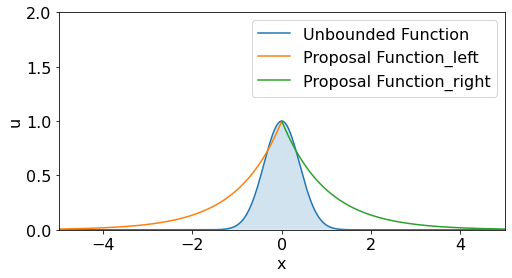

In [5]:
xs3_a = np.linspace(xmin2, 0, 1000)
ys3_a = proposal_fun(-xs3_a)

xs3_b = np.linspace(0, xmax2, 1000)
ys3_b = proposal_fun(xs3_b)


plt.figure(figsize=(8, 4))
plt.plot(xs2, ys2, label="Unbounded Function") 
plt.fill_between(xs2, ys2, 0, alpha=0.2)
plt.plot(xs3_a, ys3_a, label="Proposal Function_left")
plt.plot(xs3_b, ys3_b, label="Proposal Function_right") 

plt.xlim(xmin2, xmax2), plt.ylim(0, 2), plt.xlabel("x"), plt.ylabel("u"), plt.legend();


Let's use the Laplace distribution (used in the inverse transform exercise) - for which there is an analytical expression of the inverse CDF

A random variable has a Laplace $(\mu, b)$ distribution if its probability density function is
$$
p(x | \mu, b)=\frac{1}{2 b} \exp \left(-\frac{|x-\mu|}{b}\right)
$$

$$F^{-1}(u)=\mu-b \operatorname{sgn}(u-0.5) \ln (1-2|u-0.5|)$$


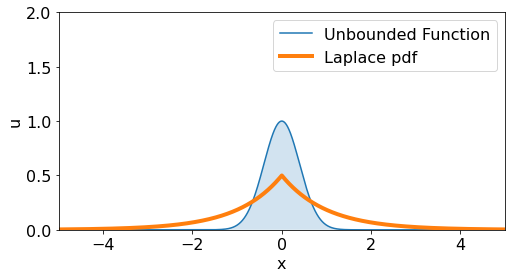

In [6]:
from scipy.stats import laplace

xs3 = np.linspace(xmin2, xmax2, num_samples)


plt.figure(figsize=(8, 4))
plt.plot(xs2, ys2, label="Unbounded Function") 
plt.fill_between(xs2, ys2, 0, alpha=0.2)
plt.plot(xs3, laplace().pdf(xs3), lw=4, label='Laplace pdf')


plt.xlim(xmin2, xmax2), plt.ylim(0, 2), plt.xlabel("x"), plt.ylabel("u"), plt.legend();



### Step 2: selecting the k coefficient
To dominate we need to multiple by k 

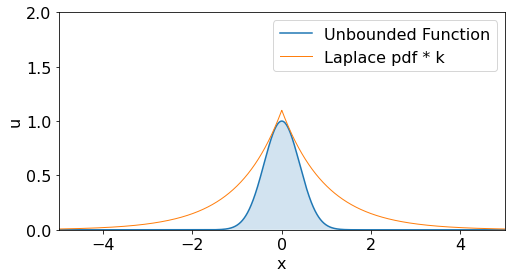

In [7]:
k=2.2


plt.figure(figsize=(8, 4))
plt.plot(xs2, ys2, label="Unbounded Function") 
plt.fill_between(xs2, ys2, 0, alpha=0.2)
plt.plot(xs3, k*laplace().pdf(xs3), lw=1, label='Laplace pdf * k')


plt.xlim(xmin2, xmax2), plt.ylim(0, 2), plt.xlabel("x"), plt.ylabel("u"), plt.legend();

### Step 3: Generating samples from the proposal distribution (using the inverse method)

Text(0, 0.5, 'Density')

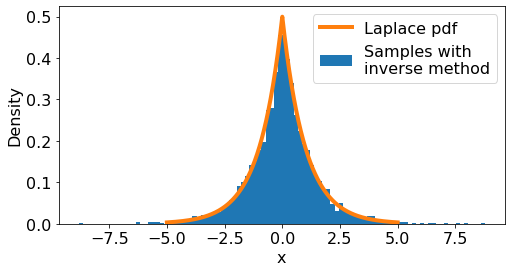

In [8]:
def inverse_transform_laplace(b, mu, num_samples):
    u = uniform.rvs(size=num_samples)
    x = (mu-b*np.sign(u-0.5)*np.log(1-2*np.abs(u-0.5)))
    return x

from scipy.stats import uniform


plt.figure(figsize=(8, 4))
plt.hist(inverse_transform_laplace(1, 0, num_samples),bins=100, density=True, label='Samples with \ninverse method');
plt.plot(xs3, laplace().pdf(xs3), lw=4, label='Laplace pdf')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')

### Step 4: Generating samples uniform distribution
### Step 5: accept if condition is satisfied

In [9]:
def accept_func(num_samples,x, u, k):
    passed = (u <= (1/k)*unbounded_func(x)/(laplace().pdf(x))).astype(int) # generate an array of 0 (not_pass) and 1 (pass)
    return x, u, passed

x4, u4, passed4 = accept_func(num_samples,inverse_transform_laplace(1, 0, num_samples), uniform.rvs(size=num_samples), k)

Efficiency is only 44.6%
k= 2.2


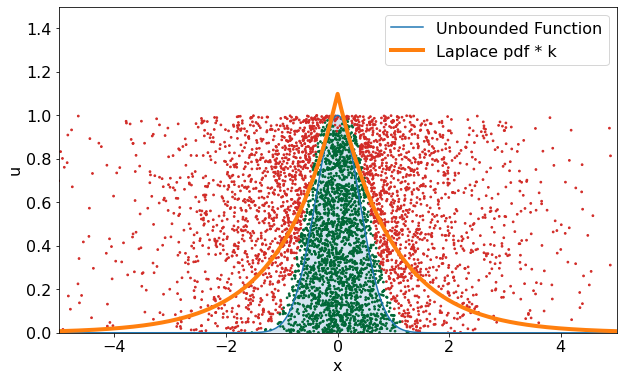

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(xs2, ys2, label="Unbounded Function") 
plt.plot(xs3, k*laplace().pdf(xs3), lw=4, label='Laplace pdf * k')
plt.fill_between(xs2, ys2, 0, alpha=0.2)
plt.scatter(x4, u4, c=passed4, cmap="RdYlGn", vmin=-0.1, vmax=1.0, lw=1, s=3)
plt.xlim(xmin2, xmax2), plt.ylim(0, 1.5), plt.xlabel("x"), plt.ylabel("u"), plt.legend();


print(f"Efficiency is only {passed4.mean() * 100:0.1f}%")
print("k=", k)


### Plot histograms of generated samples

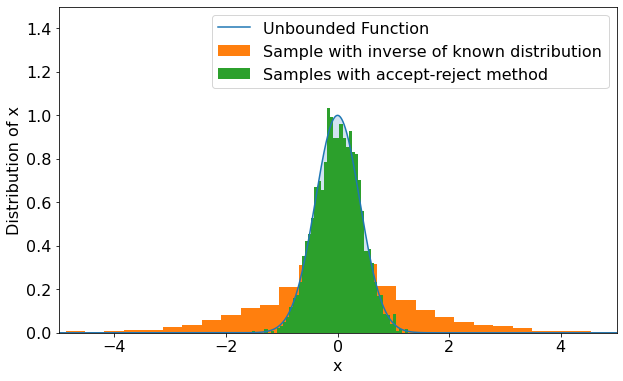

In [21]:
z=x4[np.nonzero(passed4)]   # samples generated from proposal distribution that have been accepted
 

plt.figure(figsize=(10, 6))
plt.plot(xs2, ys2, label="Unbounded Function") 
plt.fill_between(xs2, ys2, 0, alpha=0.2)
plt.hist(x4, bins=50, density=True, label='Sample with inverse of known distribution')
plt.hist(z, bins=50, density=True, label='Samples with accept-reject method')

plt.xlim(xmin2, xmax2), plt.ylim(0, 1.5), plt.xlabel("x"), plt.ylabel("Distribution of x"), plt.legend();